In [23]:
from DQN_Binary import *
import pandas as pd
import torch
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

In [24]:
n_asset = 2
x = np.arange(1, 101)
state_possible = np.array(np.meshgrid(*([x] * n_asset))).T.reshape(-1, n_asset).astype(np.float32)
state_possible = state_possible[state_possible.sum(axis=1) == 100, :] / 100

In [25]:
x = state_possible[:, 0]
dqn_action_df = pd.DataFrame(index=x)
dqn_bool_action_df = pd.DataFrame(index=x)

In [26]:
# RL:
BATCH_SIZE = 1000
GAMMA = 0.9
EPS_START = 0.99999
EPS_END = 0.05
EPS_DECAY = 1000
TAU = 0.005
LR = 1e-4

num_episodes = 20000

mu = np.linspace(50, 200, n_asset) / 1e4
sigma = np.linspace(300, 800, n_asset) / 1e4
cov = np.diag(sigma ** 2)

In [27]:
for tc in [0, 0.0005, 0.001, 0.002]:
    agent = Agent(mu=mu, cov=cov, batch_size=BATCH_SIZE, gamma=GAMMA,
                  eps_start=EPS_START, eps_end=EPS_END, eps_decay=EPS_DECAY, tau=TAU, lr=LR,
                  tc=tc)
    agent.load_models()
    action = []
    bool_action = []
    for current_state in state_possible:
        current_state = torch.Tensor(current_state)
        # tmp_action = agent.policy_net(current_state)
        tmp_action = agent.policy_net(current_state).argmax()
        # tmp_action = agent.env.action_space[optimal_action_index]
        tmp_bool_action = agent.select_action(current_state)
        action.append(tmp_action)  # just store action of first asset
        bool_action.append(tmp_bool_action[0])

    action = np.array([i.item() for i in action])
    bool_action = np.array([i.item() for i in bool_action])
    dqn_action_df[f"TC: {tc * 1e4:.0f} bps"] = action
    dqn_bool_action_df[f"TC: {tc * 1e4:.0f} bps"] = bool_action

... loading checkpoint ...
... loading checkpoint ...
... loading checkpoint ...
... loading checkpoint ...
... loading checkpoint ...
... loading checkpoint ...
... loading checkpoint ...
... loading checkpoint ...


In [28]:
dqn_action_df

,TC: 0 bps,TC: 5 bps,TC: 10 bps,TC: 20 bps
0.01,1,1,1,1
0.02,1,1,1,1
0.03,1,1,1,1
0.04,1,1,1,1
0.05,1,1,1,1
...,...,...,...,...
0.95,1,1,1,1
0.96,1,1,1,1
0.97,1,1,1,1
0.98,1,1,1,1


In [29]:
dqn_bool_action_df

,TC: 0 bps,TC: 5 bps,TC: 10 bps,TC: 20 bps
0.01,1,1,1,0
0.02,0,1,1,1
0.03,1,0,1,1
0.04,0,0,0,1
0.05,1,0,0,0
...,...,...,...,...
0.95,1,0,0,0
0.96,0,1,0,0
0.97,0,1,0,1
0.98,1,1,1,0


In [30]:
optimal_weight = find_optimal_wgt(mu, cov)
optimal_weight

array([0.63941273, 0.36058727])

In [31]:
# plt.rcParams.update({"font.size": 18})
# fig, ax = plt.subplots(1, 1, figsize=(20, 10))
# # bell_action_df.plot(ax=ax, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'], linestyle="dashed")
# dqn_action_df.plot(ax=ax, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'], linestyle="dotted")
# ax.set_xlabel("Weight on First Asset")
# ax.set_ylabel("Suggested Delta Weight on Asset 1")
# ax.axvline(optimal_weight[0], color="red", linestyle="dotted")
# ax.axhline(0, color="red", linestyle="dotted")
# ax.legend()
# plt.tight_layout()
# plt.show()

In [32]:
# sns.heatmap(dqn_bool_action_df, cmap='cividis')
# ax = plt.gca()
# # ax.add_patch(plt.Rectangle((0, optimal_weight[0]), 10, 0, fill=True, edgecolor='red', lw=1))
# ax.hlines(optimal_weight[0]*100, xmin=0, xmax=len(dqn_bool_action_df.columns), edgecolor='red', lw=3)
# plt.show()

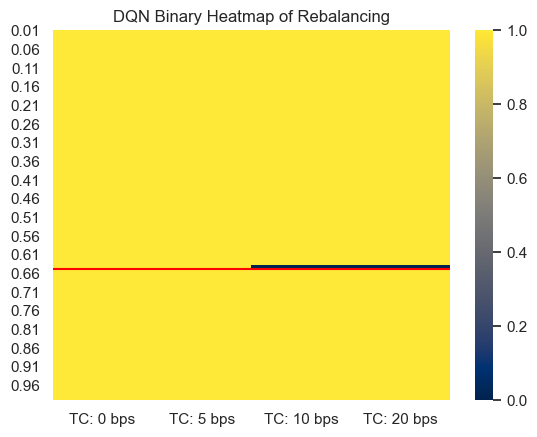

In [33]:
sns.heatmap(dqn_action_df, cmap='cividis')
y = optimal_weight[0]
ax = plt.gca()
plt.hlines(y=y*100, xmin=0, xmax=len(dqn_action_df.columns), colors='red')
plt.title("DQN Binary Heatmap of Rebalancing")
plt.show()